In [1]:
import torch
from torch import nn


class LinearModel_V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_1 = nn.Linear(in_features=3,out_features=10)
        self.linear_layer_2 = nn.Linear(in_features=10,out_features=20)
        self.linear_layer_3 = nn.Linear(in_features=20, out_features=1)

    def forward(self,x):
        return self.linear_layer_3(self.linear_layer_2(self.linear_layer_1(x)))



torch.manual_seed(42)

data_X = torch.rand(30,3)
data_y = torch.rand(30,1)


"""
INCORRECT,
X_train = torch.tensor(data_X[:20])
y_train = torch.tensor(data_y[:20])
"""

X_train = torch.tensor(data_X[:20], dtype=torch.float32)
y_train = torch.tensor(data_y[:20], dtype=torch.float32)

/var/folders/nd/ktj6jq715z1dch5hv4rsd1x80000gn/T/ipykernel_58305/4195010289.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(data_X[:20], dtype=torch.float32)
/var/folders/nd/ktj6jq715z1dch5hv4rsd1x80000gn/T/ipykernel_58305/4195010289.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(data_y[:20], dtype=torch.float32)


In [4]:
print(data_X,data_y)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411],
        [0.4294, 0.8854, 0.5739],
        [0.2666, 0.6274, 0.2696],
        [0.4414, 0.2969, 0.8317],
        [0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062],
        [0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090],
        [0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644],
        [0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895],
        [0.7539, 0.1952, 0.0050],
        [0.3068, 0.1165, 0.9103],
        [0.6440, 0.7071, 0.6581],
        [0.4913, 0.8913, 0.1447],
        [0.5315, 0.1587, 0.6542],
        [0.3278, 0.6532, 0.3958],
        [0.9147, 0.2036, 0.2018],
        [0.2018, 0.9497, 0.6666],
        [0.9811, 0.0874, 0.0041],
        [0.1088, 0.1637, 0.7025],
        [0.6790, 0.9155, 0.2418],
        [0.1591, 0.7653, 0.2979],
        [0.8035, 0.3813, 0.7860],
        [0.111

In [3]:

model_0 = LinearModel_V1()

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)



epochs = 20

for x in range(epochs):

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if x % 2 == 0:
        print(f'Epoch {x}, Loss: {loss.item()}')

Epoch 0, Loss: 0.28225940465927124
Epoch 2, Loss: 0.2349725216627121
Epoch 4, Loss: 0.19906990230083466
Epoch 6, Loss: 0.17163173854351044
Epoch 8, Loss: 0.150563582777977
Epoch 10, Loss: 0.13433127105236053
Epoch 12, Loss: 0.12179283052682877
Epoch 14, Loss: 0.11208824813365936
Epoch 16, Loss: 0.10456407070159912
Epoch 18, Loss: 0.0987207219004631


In [12]:
# Layer 1
print("Layer 1 weights:","\n", model_0.linear_layer_1.weight.detach().numpy())
print("Layer 1 bias:","\n",  model_0.linear_layer_1.bias.detach().numpy())
print("\n")


# Layer 2
print("Layer 2 weights:","\n",  model_0.linear_layer_2.weight.detach().numpy())
print("Layer 2 bias:","\n",  model_0.linear_layer_2.bias.detach().numpy())
print("\n")

# Layer 3
print("Layer 3 weights:","\n",  model_0.linear_layer_3.weight.detach().numpy())
print("Layer 3 bias:","\n",  model_0.linear_layer_3.bias.detach().numpy())

Layer 1 weights: 
 [[ 0.3945757   0.05331226  0.03290583]
 [-0.13341837 -0.50930846 -0.5301828 ]
 [-0.2793064  -0.29873967  0.17494848]
 [-0.17519055 -0.2371702   0.53987986]
 [ 0.19973311  0.40947896 -0.28148356]
 [-0.23873295  0.20750424 -0.38907334]
 [-0.38126865 -0.03399044 -0.2168902 ]
 [-0.43003222  0.34683728  0.468383  ]
 [ 0.09412214 -0.09978468 -0.53409106]
 [-0.2073759   0.15156949  0.27653226]]
Layer 1 bias: 
 [-6.2382270e-02 -2.0858622e-01  3.1411234e-01 -4.7610858e-01
  3.6180532e-01 -2.3071118e-01  1.9116333e-05 -1.0775151e-01
  7.1061552e-02 -1.6782916e-01]


Layer 2 weights: 
 [[ 0.23054647 -0.01200708  0.24726187  0.30269474 -0.15192239 -0.23237261
   0.2524712   0.24869508 -0.2426115  -0.02439465]
 [-0.31501487 -0.23903324  0.05891334  0.0911781   0.05585831 -0.07727341
   0.29822445  0.04041884 -0.18049474 -0.018236  ]
 [ 0.07792313  0.0983115  -0.22224626  0.11411526 -0.15456843 -0.26826984
  -0.17678219  0.30803046  0.26647937  0.28341794]
 [ 0.18675964  0.2318420

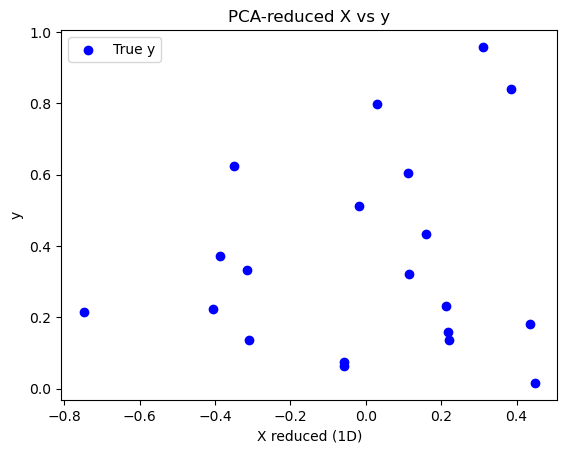

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np



pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X_train.detach().numpy())

# Step 2: Scatter plot
plt.scatter(X_reduced, y_train.detach().numpy(), color='blue', label='True y')
plt.xlabel("X reduced (1D)")
plt.ylabel("y")
plt.title("PCA-reduced X vs y")
plt.legend()
plt.show()

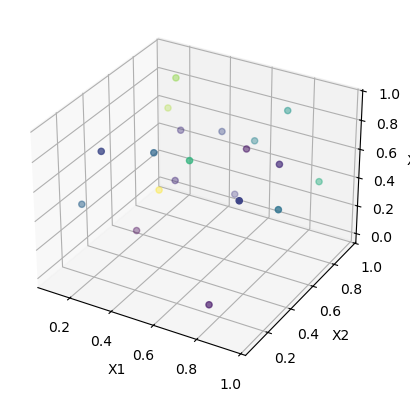

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=y_train.detach().numpy(), cmap='viridis')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
plt.show()